In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [22]:
import importlib
importlib.reload(ctf)

<module 'custom_transformers' from '/Users/deepakduggirala/Documents/kaggle/tmdb-box-office-prediction/custom_transformers.py'>

In [23]:
import custom_transformers as ctf
from custom_transformers import *

## Load Data

In [6]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## ReleaseDateTransformer

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'release_month'}>],
       [<AxesSubplot:title={'center':'release_day_of_week'}>,
        <AxesSubplot:>]], dtype=object)

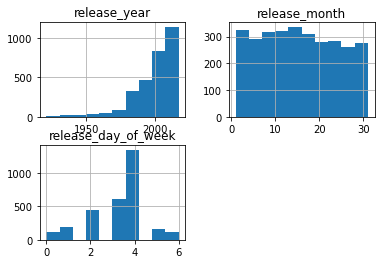

In [7]:
t = ReleaseDateTransformer()
release_date_transformed = t.fit_transform(train_data['release_date'].values)
release_date_transformed.hist()

## AttributeCountTransformer

In [14]:
act = make_pipeline(SimpleImputer(strategy='constant', fill_value='[]'), AttributeCountTransformer(), SimpleImputer(strategy='median', missing_values=0))
act.fit_transform(train_data[['cast']].values)

array([[24.],
       [20.],
       [51.],
       ...,
       [15.],
       [26.],
       [34.]])

## ExtractionTransformer

In [25]:
nameET = ExtractionTransformer('name')
nameET.fit_transform(train_data[train_data['genres'].notna()]['genres'].values)

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2988                     [Comedy, Romance]
2989                        [Drama, Music]
2990    [Crime, Action, Mystery, Thriller]
2991                     [Comedy, Romance]
2992           [Thriller, Action, Mystery]
Length: 2993, dtype: object

## MultinomialAttributeTransformer - Name Extraction Pipeline

In [ ]:
mat = MultinomialAttributeTransformer()
mat.fit_transform(genres.values), mat.categories_

In [28]:
pipe = make_name_extraction_pipeline()
pipe.fit_transform(train_data[['genres']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [31]:
pipe.named_steps['multinomialattributetransformer'].categories_

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science_Fiction',
 'TV_Movie',
 'Thriller',
 'War',
 'Western']